# 2.6 概率

### 2.6.1 基本概率论

假设我们掷骰子，想知道看到1的几率有多大，而不是看到另一个数字。 如果骰子是公平的，那么所有六个结果都有相同的可能发生， 因此我们可以说发生的概率为$\frac{1}{6}$。

In [1]:
import mindspore.numpy as mnp
from mindspore import ops
from collections import Counter
import numpy as np

fair_probs = mnp.ones(6) / 6
output1 = ops.multinomial(fair_probs, 1, replacement=True, seed=4)
output2 = ops.multinomial(fair_probs, 10, replacement=True, seed=4)
output3 = ops.multinomial(fair_probs, 1000, replacement=True, seed=4)

print("output1: ", output1)
print("output2: ", output2)
print("output3:", Counter(output3.asnumpy()))

output1:  [0]
output2:  [5 0 4 0 2 5 0 3 3 2]
output3: Counter({1: 194, 2: 168, 0: 167, 3: 161, 5: 156, 4: 154})


`ops.multinomial`返回从位于输入张量的相应行中的多项概率分布中采样的张量。

In [ ]:
"""
mindspore.ops.multinomial(inputs, num_sample, replacement=True, seed=None)

Parameters:
    inputs (Tensor) : The input tensor containing probabilities, must be 1 or 2 dimensions, with float32 data type.
    num_sample (int) : Number of samples to draw.
    replacement (bool, optional) : Whether to draw with replacement or not, default True.
    seed (int, optional) : Seed is used as entropy source for the random number engines to generate pseudo-random numbers, must be non-negative. Default: None.
"""

MindSpore 没有提供 PyTorch 的 ` torch.distributions.multinomial` 一样的接口，可以用 `mindspore.ops.multinomial` 代替再去折腾，或者直接用 `numpy` 的接口。

In [2]:
import numpy as np

fair_probs = np.ones(6) / 6
output1 = np.random.multinomial(1, fair_probs, size=1)
output2 = np.random.multinomial(10, fair_probs, size=1)
output3 = np.random.multinomial(1000, fair_probs, size=1)

print("output1: ", output1)
print("output2: ", output2)
print("output3: ", output3)
print("output3(%): ", output3 / 1000)

output1:  [[0 0 1 0 0 0]]
output2:  [[1 2 1 2 2 2]]
output3:  [[167 161 161 173 173 165]]
output3(%):  [[0.167 0.161 0.161 0.173 0.173 0.165]]


因为我们是从一个公平的骰子中生成的数据，我们知道每个结果都有真实的概率$\frac{1}{6}$，大约是0.167，所以上面输出的估计值看起来不错。

我们也可以看到这些概率如何随着时间的推移收敛到真实概率。 让我们进行500组实验，每组抽取10个样本。

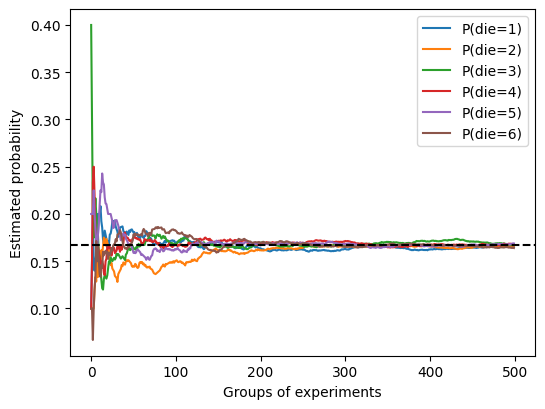

In [3]:
from matplotlib import pyplot as plt

counts = np.random.multinomial(10, fair_probs, size=500)
cum_counts = counts.astype(np.float32).cumsum(axis=0)
estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)

plt.rcParams['figure.figsize'] = (6, 4.5)

for i in range(6):
    plt.plot(estimates[:, i], label=("P(die=" + str(i + 1) + ")"))
plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend()